<h1><center>DATA ANALYSIS WITH PYTHON</center></h1>

## 1. A FIRST APPROACH TO PANDAS

### 1.1. PANDAS DATA READER

The data reader offers access to a large number of sources.

- Tiingo
- IEX
- Alpha Vantage
- Enigma
- Quandl
- St.Louis FED (FRED)
- Kenneth French’s data library
- World Bank
- OECD
- Eurostat
- Thrift Savings Plan
- Nasdaq Trader symbol definitions
- Stooq
- MOEX

The way of downloading this information can be found at : https://readthedocs.org/projects/pandas-datareader/downloads/pdf/latest/


In [1]:
import numpy as np
import datetime as dt

In [2]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
start=dt.datetime(2000,1,1)
end =dt.datetime(2018,12,31)

In [4]:
df = web.DataReader('TSLA',"yahoo", start,end)

In [5]:
print (df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


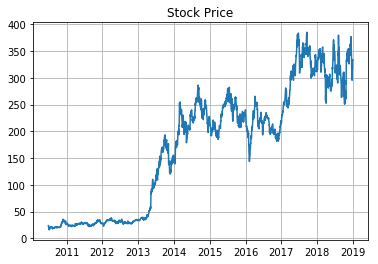

In [6]:
plt.plot(df['Adj Close'])
plt.grid()
plt.title("Stock Price")
plt.show()

## 1.2. A DATA FRAME

In [7]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np

# The structure of a dataframe looks like this:
web_stats={'Day':[1,2,3,4,5,6],
          'Visitors':[43,53,34,45,64,34],
          'Bounce_Rate':[65,72,62,64,54,66]}

df= pd.DataFrame(web_stats)

In [8]:
print(df)

   Day  Visitors  Bounce_Rate
0    1        43           65
1    2        53           72
2    3        34           62
3    4        45           64
4    5        64           54
5    6        34           66


In [9]:
print(df.head(2))

   Day  Visitors  Bounce_Rate
0    1        43           65
1    2        53           72


In [10]:
print(df.tail(2))

   Day  Visitors  Bounce_Rate
4    5        64           54
5    6        34           66


In [11]:

df.set_index('Day', inplace=True)
# It is important that anytyme we define and index we accompany the instruction to have an inplace=True parameter.  
#In fact we are generating a new dataframe that replaces the original one

In [12]:
df.head()

,Visitors,Bounce_Rate
Day,,
1,43,65
2,53,72
3,34,62
4,45,64
5,64,54


## 1.3. FROM PANDAS TO NUMPY AND VICEVERSA

In [13]:
df['Visitors'][1]

43

In [14]:
# for referencing multiple columns, we need to use a list
df[["Visitors","Bounce_Rate"]]

,Visitors,Bounce_Rate
Day,,
1,43,65
2,53,72
3,34,62
4,45,64
5,64,54
6,34,66


In [15]:
# We can call the data differently
type(df.Visitors)

pandas.core.series.Series

In [16]:
type(df["Visitors"])

pandas.core.series.Series

In [17]:
# and we can convert them to lists

In [18]:
df.Visitors.tolist()

[43, 53, 34, 45, 64, 34]

In [19]:
df["Visitors"].tolist()

[43, 53, 34, 45, 64, 34]

In [20]:
# This can be converted to an np.arraya
a= np.array(df.Visitors.tolist())
print(a)
type(a)

[43 53 34 45 64 34]


numpy.ndarray

In [21]:
# We can go back to a panda dataframe
pd.DataFrame(a)

,0
0,43
1,53
2,34
3,45
4,64
5,34


## 2. IMPROTING DATA

### 2.1. QUANDL

The premier source for financial, economic, and alternative datasets, serving investment professionals. Quandl’s platform is used by over 400,000 people, including analysts from the world’s top hedge funds, asset managers and investment banks. More on what we do.

The information is available at www.quandl.com

We will log-in at Quandl and run a search. Say Housing prices Zip Code 77006

We will go for Zillow home value index, Median List Price -77006

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import quandl
# Quandl needs to be activated
api_key=open('quandlapikey.txt','r').read()
quandl.ApiConfig.api_key = api_key

In [32]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [33]:
houston=quandl.get("ZILLOW/Z77006_ZMTY", authtoken=api_key)

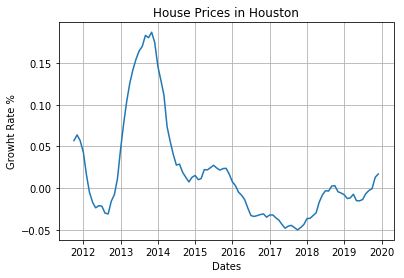

In [34]:
plt.plot(houston)
plt.title("House Prices in Houston")
plt.grid()
plt.ylabel("Growht Rate %")
plt.xlabel("Dates")
plt.show()

In [35]:
san_diego=quandl.get("ZILLOW/C1084_LPCSSF", authtoken=api_key)

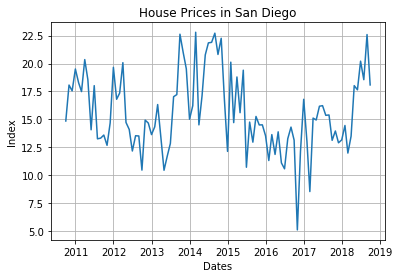

In [36]:
plt.plot(san_diego)
plt.title("House Prices in San Diego")
plt.grid()
plt.ylabel("Index")
plt.xlabel("Dates")
plt.show()


In [37]:
usdmxn=quandl.get("BIS/US_DMXMXNA", authtoken=api_key)

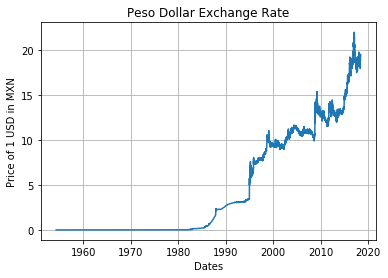

In [38]:
plt.plot(usdmxn)
plt.title("Peso Dollar Exchange Rate")
plt.grid()
plt.ylabel("Price of 1 USD in MXN")
plt.xlabel("Dates")
plt.show()

### 2.2. FRED. FEDERAL RESERVE

In [39]:
import datetime as dt
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2015, 9, 1)
cpi = web.DataReader("CPIAUCNS", "fred", start, end)
cpi.head()

,CPIAUCNS
DATE,
2000-01-01,168.8
2000-02-01,169.8
2000-03-01,171.2
2000-04-01,171.3
2000-05-01,171.5


In [40]:
df1 = pd.DataFrame({'month': [dt.datetime.strftime(i, "%Y-%m") for i in cpi.index]})
df1['qtr'] = [str(x.year) + "-Q" + str(x.quarter) for x in cpi.index]
df1['m_cpi'] = cpi.values
df1.index = cpi.index
grp = df1.groupby('qtr', as_index = False)
df2 = grp['m_cpi'].agg({'q_cpi': np.mean})
df3 = pd.merge(df1, df2, how = 'inner', left_on = 'qtr', right_on = 'qtr')
maxm_cpi = np.array(df3.m_cpi)[-1]
maxq_cpi = np.array(df3.q_cpi)[-1]
df3['m_factor'] = maxm_cpi / df3.m_cpi
df3['q_factor'] = maxq_cpi / df3.q_cpi
df3.index = cpi.index
final = df3.sort_index(ascending = False)

In [41]:
final.head()

,month,qtr,m_cpi,q_cpi,m_factor,q_factor
DATE,,,,,,
2015-09-01,2015-09,2015-Q3,237.945,238.305000,1.000000,1.000000
2015-08-01,2015-08,2015-Q3,238.316,238.305000,0.998443,1.000000
2015-07-01,2015-07,2015-Q3,238.654,238.305000,0.997029,1.000000
2015-06-01,2015-06,2015-Q2,238.638,237.680667,0.997096,1.002627
2015-05-01,2015-05,2015-Q2,237.805,237.680667,1.000589,1.002627


### 2.3. TIINGO MARKET DATA

TIINGO  documentation can be reached at :

https://readthedocs.org/projects/tiingo-python/downloads/pdf/latest/


In [42]:
from tiingo import TiingoClient
config={}
api_key=open('tiingoapikey.txt','r').read()
config['api_key']=api_key
client=TiingoClient(config)

In [43]:
# Get Ticker
ticker_metadata = client.get_ticker_metadata("GOOGL")

# Get latest prices, based on 3+ sources as JSON, sampled weekly
ticker_price = client.get_ticker_price("GOOGL", frequency="weekly")

# Get historical GOOGL prices from August 2017 as JSON, sampled daily
historical_prices = pd.DataFrame(client.get_ticker_price("GOOGL",
fmt='json',
startDate='2017-08-01',
endDate='2017-08-31',
frequency='daily'))

# Check what tickers are available, as well as metadata about each ticker
# including supported currency, exchange, and available start/end dates.
tickers = client.list_stock_tickers()




In [44]:
historical_prices.head()


,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2017-08-01T00:00:00.000Z,946.56,954.49,944.960,947.81,1205799,946.56,954.49,944.960,947.81,1205799,0.0,1.0
1,2017-08-02T00:00:00.000Z,947.64,949.10,932.521,948.37,2019979,947.64,949.10,932.521,948.37,2019979,0.0,1.0
2,2017-08-03T00:00:00.000Z,940.30,950.00,939.440,949.10,1028591,940.30,950.00,939.440,949.10,1028591,0.0,1.0
3,2017-08-04T00:00:00.000Z,945.79,947.54,939.795,943.95,1192871,945.79,947.54,939.795,943.95,1192871,0.0,1.0
4,2017-08-07T00:00:00.000Z,945.75,948.96,943.500,947.52,1405132,945.75,948.96,943.500,947.52,1405132,0.0,1.0


In [36]:
historical_prices.set_index("date", inplace=True)

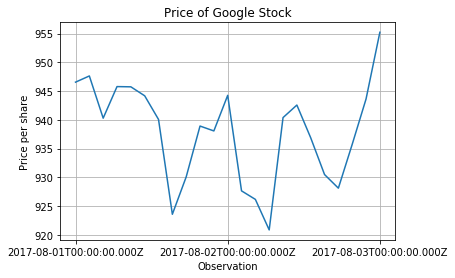

In [37]:
plt.plot(historical_prices["close"])
plt.title("Price of Google Stock")
plt.grid()
plt.xticks(np.arange(0, len(historical_prices), step=11))
plt.ylabel("Price per share")
plt.xlabel("Observation")
plt.show()

### 2.4. WORLD BANK DATA

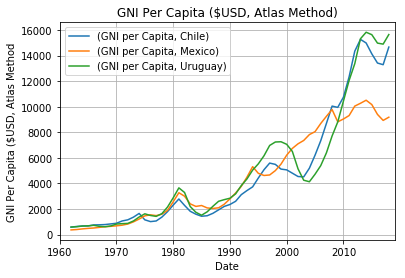

In [38]:
import wbdata
import pandas
import matplotlib.pyplot as plt
 
#set up the countries I want
countries = ["CL","UY","MX"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
 
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');
plt.grid()


### 3. IMPORT FROM A CSV FILE

### 3.1. CONVERT A PANDA DATAFRAME TO CSV

In [71]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [72]:
start=dt.datetime(2000,1,1)
end =dt.datetime(2018,12,31)

In [73]:
df = web.DataReader('TSLA',"yahoo", start,end)
type(df)

pandas.core.frame.DataFrame

In [74]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [75]:
df.to_csv('Tesla_stock.csv')

### 3.2. IMPORT FROM CSV TO PANDAS

In [76]:
_df=pd.read_csv('Tesla_stock.csv')

In [77]:
_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
1,2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2,2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
3,2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
4,2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [78]:
# There are two ways of setting the index. One, is to import the csv and then define de index from pandas

_df.set_index('Date', inplace=True)

In [79]:
_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


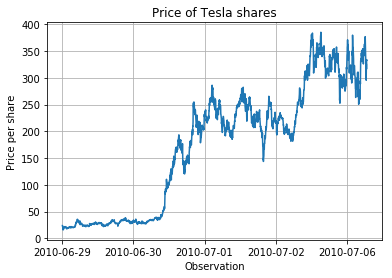

In [80]:
plt.plot(_df["Close"])
plt.title("Price of Tesla shares")
plt.ylabel("Price per share")

plt.xticks(np.arange(0, len(_df), step=500))
plt.grid()
plt.xlabel("Observation")
plt.show()

In [81]:
# Another way is to set the index directly from importing the data

_df=pd.read_csv('Tesla_stock.csv', index_col=0)

In [82]:
_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [83]:
# We can rename the columns
_df.columns=['Maximum', 'Minimum', 'First Trade', 'Last Trade', 'Shares Traded', 'Adjusted Close']

In [84]:
_df.head()

,Maximum,Minimum,First Trade,Last Trade,Shares Traded,Adjusted Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [85]:
_df.to_csv("Renamed_Tesla_Frame.csv")

In [86]:
df_=pd.read_csv('Renamed_Tesla_Frame.csv', index_col=0)

In [87]:
df_.head()

,Maximum,Minimum,First Trade,Last Trade,Shares Traded,Adjusted Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


## 5. CONCATENATION, APPENDING AND MERGING DATAFRAMES

In [88]:
import pandas as pd

We will work with different dataframes with different characteristics.

- There are two Data Frames with the same columns but different indexes
- There are two Data Frames with the same indexes but different columns

### 5.1. CONCATENATION

In [89]:
df1=pd.DataFrame({'HPI':[80,85,88,85],
                    'Int Rate':[2,3,2,2],
                    'US_GDP_Thousands':[50,55,60,55]},
                    index=[2001,2002,2003,2004])

df2=pd.DataFrame({'HPI':[80,85,88,85],
                    'Int Rate':[2,3,2,2],
                    'US_GDP_Thousands':[50,55,60,55]},
                    index=[2005,2006,2007,2008])

df3=pd.DataFrame({'HPI':[80,85,88,85],
                    'Int Rate':[2,3,2,2],
                    'Low_tier_HPI':[50,55,40,53]},
                    index=[2001,2002,2003,2004])

In [90]:
# We can concatenate the two series with the same concepts and different years.
concat=pd.concat([df1,df2])

In [91]:
print(concat)

      HPI  Int Rate  US_GDP_Thousands
2001   80         2                50
2002   85         3                55
2003   88         2                60
2004   85         2                55
2005   80         2                50
2006   85         3                55
2007   88         2                60
2008   85         2                55


In [92]:
# We can concatenate the two series with the same concepts and different years.
concat=pd.concat([df1,df2,df3], sort=False)
print(concat)

      HPI  Int Rate  US_GDP_Thousands  Low_tier_HPI
2001   80         2              50.0           NaN
2002   85         3              55.0           NaN
2003   88         2              60.0           NaN
2004   85         2              55.0           NaN
2005   80         2              50.0           NaN
2006   85         3              55.0           NaN
2007   88         2              60.0           NaN
2008   85         2              55.0           NaN
2001   80         2               NaN          50.0
2002   85         3               NaN          55.0
2003   88         2               NaN          40.0
2004   85         2               NaN          53.0


### 5.2. APPENDING

In [93]:
# This appends at the end
# The appending is generally useful for updating a dataframe
df4=df1.append(df2)

In [94]:
print(df4)

      HPI  Int Rate  US_GDP_Thousands
2001   80         2                50
2002   85         3                55
2003   88         2                60
2004   85         2                55
2005   80         2                50
2006   85         3                55
2007   88         2                60
2008   85         2                55


In [95]:
df5=df4.append(df3, sort=False)

In [96]:
print(df5)

      HPI  Int Rate  US_GDP_Thousands  Low_tier_HPI
2001   80         2              50.0           NaN
2002   85         3              55.0           NaN
2003   88         2              60.0           NaN
2004   85         2              55.0           NaN
2005   80         2              50.0           NaN
2006   85         3              55.0           NaN
2007   88         2              60.0           NaN
2008   85         2              55.0           NaN
2001   80         2               NaN          50.0
2002   85         3               NaN          55.0
2003   88         2               NaN          40.0
2004   85         2               NaN          53.0


### 5.3. MERGING

Merging will obviate the indexing, which facilitates and gives flexibility to the process of combining dataframes.

In [97]:
df1=pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_Rate':[2,3,2,2],
                    'US_GDP_Thousands':[50,55,60,55]},
                    index=[2001,2002,2003,2004])

df2=pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_Rate':[2,3,2,2],
                    'US_GDP_Thousands':[50,55,60,55]},
                    index=[2005,2006,2007,2008])

df3=pd.DataFrame({'HPI':[80,85,88,85],
                    'Unemployment':[2,3,2,2],
                    'Low_tier_HPI':[50,55,40,53]},
                    index=[2001,2002,2003,2004])

In [98]:
#We define how to collect different columns to avoid dupplication of information

df4=pd.merge(df1, df2, on=['HPI', 'Int_Rate', 'US_GDP_Thousands'])

In [99]:
print(df4)

   HPI  Int_Rate  US_GDP_Thousands
0   80         2                50
1   85         3                55
2   88         2                60
3   85         2                55


### 5.4 JOINING

We will have to have some strategy and objective to construct dataframes 

In [100]:
df1.set_index('HPI', inplace=True)

In [101]:
df3.set_index('HPI', inplace=True)

In [102]:
df1.join(df3)

,Int_Rate,US_GDP_Thousands,Unemployment,Low_tier_HPI
HPI,,,,
80,2,50,2,50
85,3,55,3,55
85,3,55,2,53
85,2,55,3,55
85,2,55,2,53
88,2,60,2,40


## 4. BUILDING A DATA SET

The objective is to create a data base with house price information for the entire United States.

- We will go for Freddie Mac info available at Quandl.
- We will downloaed as a first example information for Alaska
- Then, we will obtain from Wikkipedia the list of abreviations of states
- We will construct use that list to generate multiple data frames and we will merge them into a sigle large dataframe
- We finally clean up the table placing the names of the state identifiers on top
- We will pickle-out the dataframe to be able to use it latter on without the need to go to Quandl to get the information each time around

### 4.1. WE WILL RESTART THE KERNEL AT THIS POINT

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

### 4.2. DOWNLOAD THE INFORMATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quandl
api_key=open('quandlapikey.txt','r').read()
quandl.ApiConfig.api_key = api_key

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
alaska=quandl.get("FMAC/HPI_AK", authtoken=api_key)

In [4]:
fiddy_states=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')

In [5]:
# We see that we will have several tables
fs=fiddy_states[0]
type(fs)

pandas.core.frame.DataFrame

In [6]:
postal=fs['postal abbreviation[1]']

In [8]:
postal.columns=['code']
print(postal)

   code
0    AL
1    AK
2    AZ
3    AR
4    CA
5    CO
6    CT
7    DE
8    FL
9    GA
10   HI
11   ID
12   IL
13   IN
14   IA
15   KS
16   KY
17   LA
18   ME
19   MD
20   MA
21   MI
22   MN
23   MS
24   MO
25   MT
26   NE
27   NV
28   NH
29   NJ
30   NM
31   NY
32   NC
33   ND
34   OH
35   OK
36   OR
37   PA
38   RI
39   SC
40   SD
41   TN
42   TX
43   UT
44   VT
45   VA
46   WA
47   WV
48   WI
49   WY


Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

pickle has two main methods. 

- The first one is dump, which dumps an object to a file object and 
- the second one is load, which loads an object from a file object.
- We will select only the NSA Value column and create the new data frame. To that end remeber to use the ***df=df[[  ]]*** format, with double bracket

In [ ]:
df=quandl.get("FMAC/HPI_AK", authtoken=api_key)
df[abbv]["NSA Value"] = (df[abbv]["NSA Value"]-df[abbv]["NSA Value"][0]) / df[abbv]["NSA Value"][1] * 100.0

In [15]:
main_df=pd.DataFrame()

for abbv in postal['code']:
    query="FMAC/HPI_"+str(abbv)
    df=quandl.get(query, authtoken=api_key)
    df["NSA Value"] = (df["NSA Value"]-df["NSA Value"][0]) / df["NSA Value"][1] * 100.0
    if main_df.empty:
        main_df=df[["NSA Value"]]
    else:
        main_df=main_df.join(df[["NSA Value"]], rsuffix='_'+str(abbv))
        main_df.rename(columns={'NSA Value':'NSA Value_AL'}, inplace=True)       

In [16]:
new_column_name=postal['code'].tolist()
main_df.columns=new_column_name
main_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1975-02-28,0.607726,1.330277,1.483122,0.544938,0.368362,1.164207,1.927775,0.077144,3.817256,-0.953210,...,-0.970655,-0.180396,0.994659,1.428275,0.653275,1.021925,0.569318,1.629128,1.485198,1.501811
1975-03-31,1.302051,2.698162,2.829413,0.979858,1.586119,2.317899,3.386970,0.256645,9.438379,-1.444500,...,-1.953326,-0.210196,2.772185,2.693702,1.260758,1.732646,1.214026,3.308601,2.905412,3.067677
1975-04-30,2.130298,4.161566,3.805844,1.322017,3.553812,3.362668,4.229506,0.633249,16.297809,-1.395250,...,-2.915876,0.000059,5.260340,3.698691,1.759741,2.223087,1.797877,5.020409,4.128378,4.654521
1975-05-31,2.870439,5.839200,4.212640,1.725980,5.159972,4.178071,4.568977,1.259043,16.900664,-1.095542,...,-3.761116,0.480048,5.779838,4.411477,2.148018,2.674099,2.291630,6.749019,5.097553,6.161372


### 4.3. PICKLE IN AN OUT THE DATA FRAME

We will ***pickle*** the dataframe object.

Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

In [17]:
import pickle
# First we open the pickle file with the intention of writing bytes.
pickle_out=open('fiddy_states.pickle', 'wb')
# Then, we will dumpl the dataframe information
pickle.dump(main_df, pickle_out)
pickle_out.close()

From here onwards, we will not need to open Quandl. We will recover the pickle file and work with it.

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
pickle_in=open('fiddy_states.pickle', 'rb')
HPI_data=pickle.load(pickle_in)

In [3]:
print(HPI_data)

                    AL          AK          AZ          AR           CA  \
Date                                                                      
1975-01-31    0.000000    0.000000    0.000000    0.000000     0.000000   
1975-02-28    0.607726    1.330277    1.483122    0.544938     0.368362   
1975-03-31    1.302051    2.698162    2.829413    0.979858     1.586119   
1975-04-30    2.130298    4.161566    3.805844    1.322017     3.553812   
1975-05-31    2.870439    5.839200    4.212640    1.725980     5.159972   
...                ...         ...         ...         ...          ...   
2019-06-30  322.044263  430.927732  600.187934  315.340712  1425.874790   
2019-07-31  322.999686  431.620407  605.394370  317.417111  1428.364092   
2019-08-31  322.888776  431.395957  609.246034  319.257407  1425.570258   
2019-09-30  323.504920  430.523139  611.067734  320.418392  1422.395627   
2019-10-31  323.651369  428.941551  613.459602  321.229987  1418.871357   

                    CO  

In [4]:
#We will calculate the national average and place it on an additional column

HPI_data["US"]=HPI_data.sum(axis = 1, skipna = True) /50
HPI_data.head(2)


,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,US
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1975-02-28,0.607726,1.330277,1.483122,0.544938,0.368362,1.164207,1.927775,0.077144,3.817256,-0.95321,...,-0.180396,0.994659,1.428275,0.653275,1.021925,0.569318,1.629128,1.485198,1.501811,0.684391


## 5. CORRELATION

### 5.1. PLOTTING THE DATA BASE

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


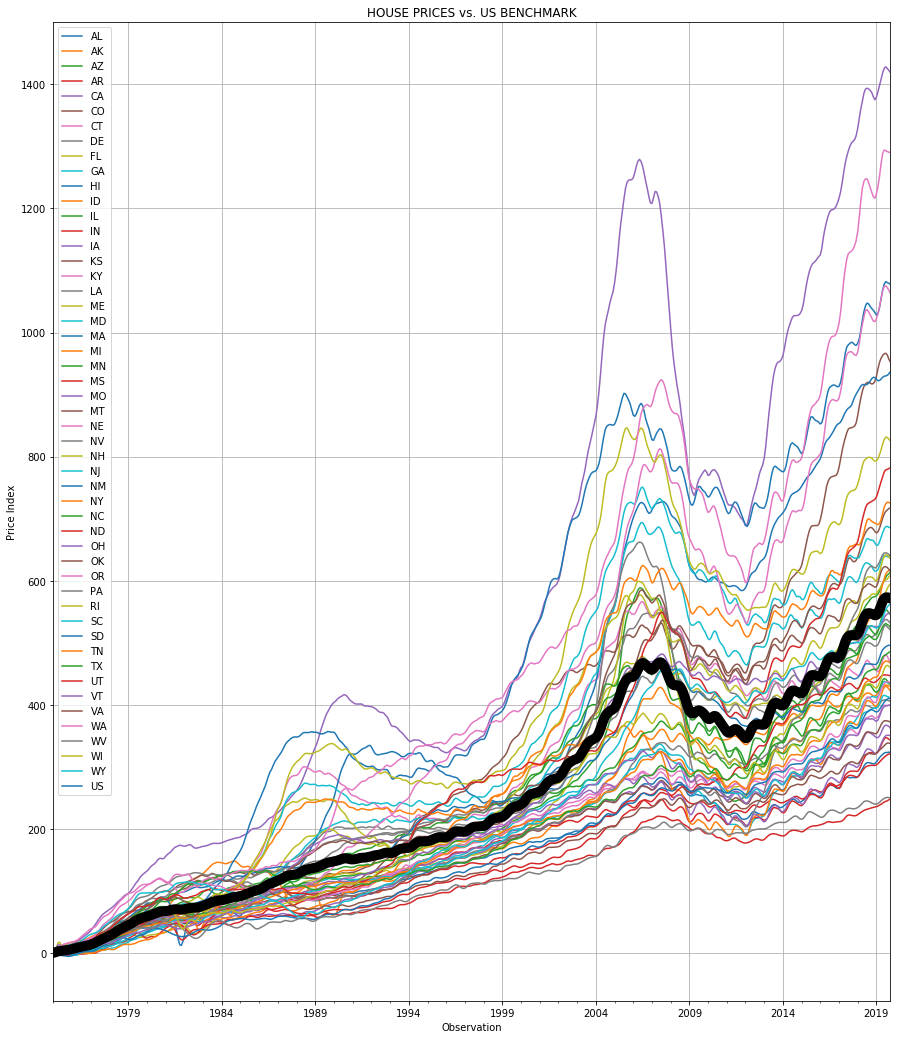

In [29]:
#This includes the labels
plt.rcParams['figure.figsize']=(15,18)

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data.plot(ax=ax1)
HPI_data["US"].plot(color='k',ax=ax1, linewidth=10)

plt.title("HOUSE PRICES vs. US BENCHMARK")
plt.grid()
plt.ylabel("Price Index")
plt.xlabel("Observation")


plt.show()

In [18]:
HPICH=HPI_data.loc['2015':'2019'].pct_change()

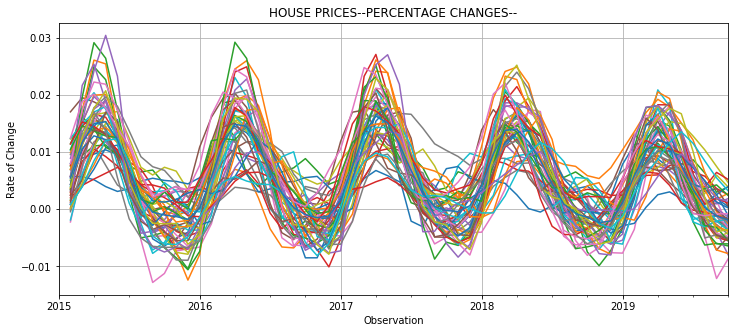

In [35]:
HPICH.plot()
plt.rcParams['figure.figsize']=(8,8)
plt.title("HOUSE PRICES--PERCENTAGE CHANGES--")
plt.grid()
plt.rcParams['figure.figsize']=(10,5)
plt.legend().remove()
plt.ylabel("Rate of Change")
plt.xlabel("Observation")
plt.show()

### 5.2. CORRELATION TABLE

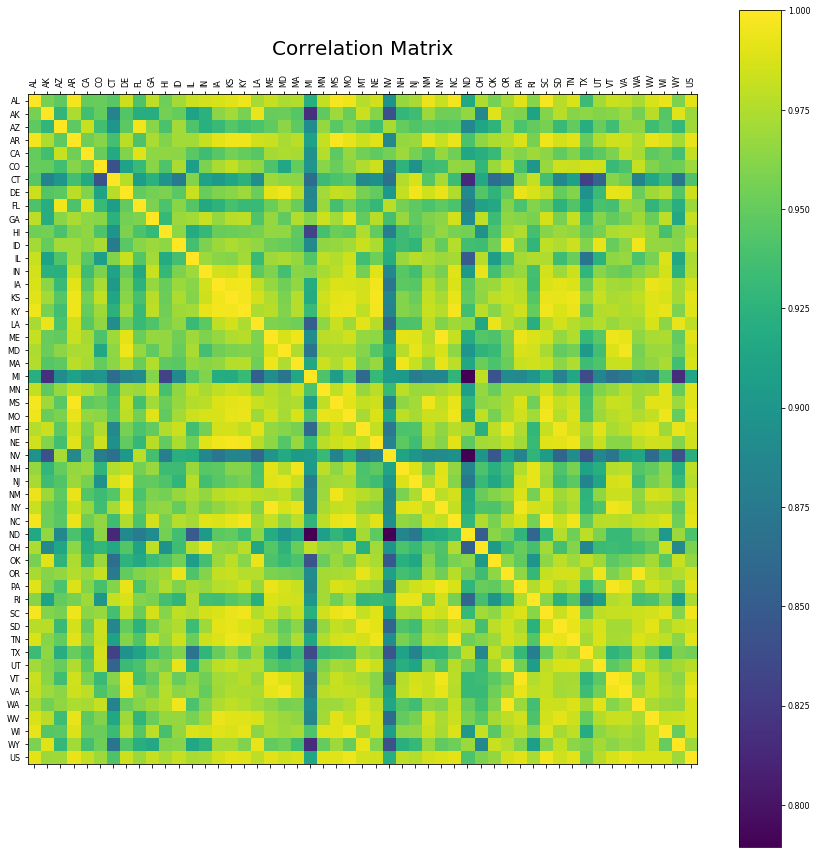

In [30]:
HPI_State_Correlation = HPI_data.corr()

f= plt.figure(figsize=(15, 15))
plt.matshow(HPI_State_Correlation, fignum=f.number)
plt.xticks(range(HPI_State_Correlation.shape[1]), HPI_State_Correlation.columns, fontsize=8, rotation=90)
plt.yticks(range(HPI_State_Correlation.shape[1]), HPI_State_Correlation.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

## 6. RESAMPLING

### 6.1 RESAMPLING OPTIONS


- B	business day frequency
- C	custom business day frequency (experimental)
- D	calendar day frequency
- W	weekly frequency
- M	month end frequency
- BM	business month end frequency
- CBM	custom business month end frequency
- MS	month start frequency
- BMS	business month start frequency
- CBMS	custom business month start frequency
- Q	quarter end frequency
- BQ	business quarter endfrequency
- QS	quarter start frequency
- BQS	business quarter start frequency
- A	year end frequency
- BA	business year end frequency
- AS	year start frequency
- BAS	business year start frequency
- BH	business hour frequency
- H	hourly frequency
- T	minutely frequency
- S	secondly frequency
- L	milliseonds
- U	microseconds
- N	nanoseconds

In [73]:
California=HPI_data['CA'].resample('A').mean()
Texas=HPI_data['TX'].resample('A').mean()
Florida=HPI_data['FL'].resample('A').mean()
New_York=HPI_data['NY'].resample('A').mean()

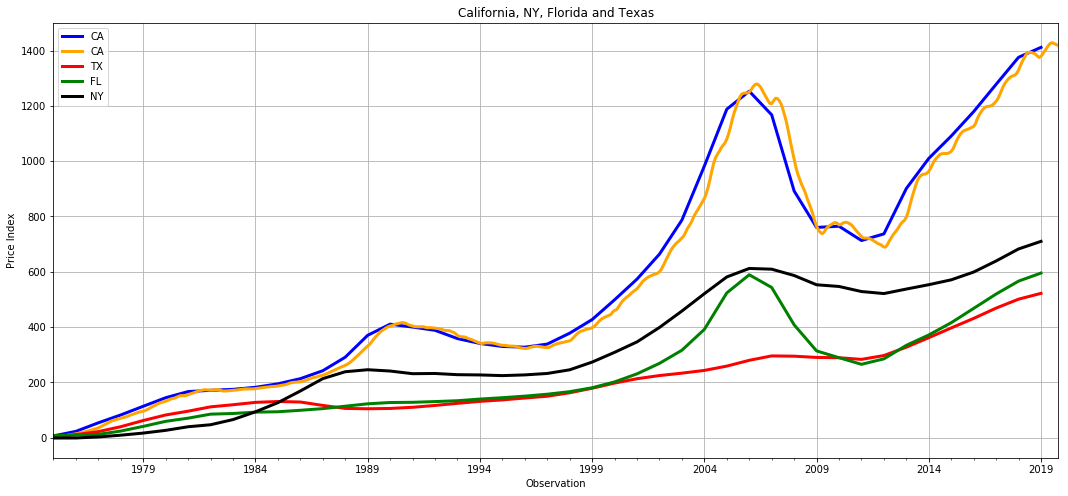

In [79]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

California.plot(ax=ax1, color="blue", linewidth=3, legend="California")
HPI_data['CA'].plot(ax=ax1, color="orange", linewidth=3, legend="California-Original Series")
Texas.plot(color='red',ax=ax1, linewidth=3, legend="Texas")
Florida.plot(color='green',ax=ax1, linewidth=3, legend="Florida")
New_York.plot(color='k',ax=ax1, linewidth=3, legend="New York")

plt.title("California, NY, Florida and Texas")
plt.grid()
plt.ylabel("Price Index")
plt.xlabel("Observation")

plt.show()

### 6.2. DELALING WITN 'NAN' ENTRIES: THE SAN DIEGO MARKET

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import quandl

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
api_key=open('quandlapikey.txt','r').read()
quandl.ApiConfig.api_key = api_key

In [4]:
san_diego=quandl.get("FMAC/HPI_SDGCA", authtoken=api_key)
hillcrest=quandl.get("ZILLOW/Z92103_ZTTY", authtoken=api_key)
hospitals=quandl.get("ZILLOW/Z92104_ZTTY", authtoken=api_key)
university=quandl.get("ZILLOW/Z92116_ZTTY", authtoken=api_key)
fashion=quandl.get("ZILLOW/Z92108_ZTTY", authtoken=api_key)
friars=quandl.get("ZILLOW/Z92123_ZTTY", authtoken=api_key)
caminito=quandl.get("ZILLOW/Z92120_ZTTY", authtoken=api_key)
chula=quandl.get("ZILLOW/Z91914_ZTTY", authtoken=api_key)

In [5]:
def cumm_level(neighborhood):
    index_n=neighborhood.index
    df= pd.DataFrame(index=index_n, columns=["Price Index"])
    n=len(neighborhood)
    df["Price Index"][0]=100
    m=np.arange(1,n)
    for j in m:
        df["Price Index"][j]=df["Price Index"][j-1]*(1+neighborhood["Value"][j-1]/12)
   
    return df
    

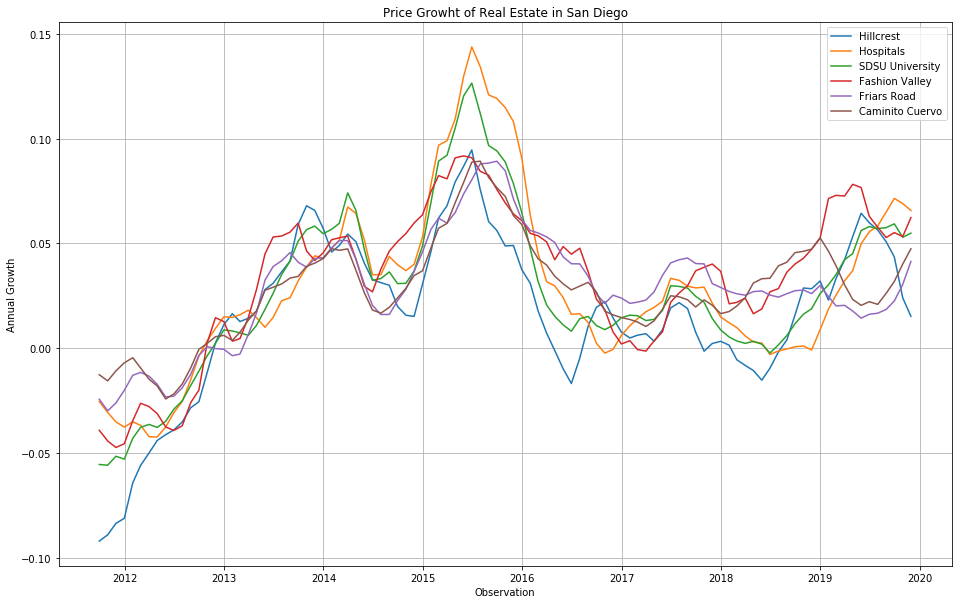

In [18]:

fig, ax = plt.subplots(1)

plt.rcParams['figure.figsize']=(25,20)


line1,= ax.plot(hillcrest)
line2,= ax.plot(hospitals)
line3,= ax.plot(university)
line4,= ax.plot(fashion)
line5,= ax.plot(friars)
line6,= ax.plot(caminito)



line1.set_label("Hillcrest")
line2.set_label("Hospitals")
line3.set_label("SDSU University")
line4.set_label("Fashion Valley")
line5.set_label("Friars Road")
line6.set_label("Caminito Cuervo")



plt.grid()
plt.legend()
plt.title("Price Growht of Real Estate in San Diego")
plt.ylabel("Annual Growth")
plt.xlabel("Observation")
plt.show()

In [7]:
c_hillcrest=cumm_level(hillcrest)
c_hospitals=cumm_level(hospitals)
c_university=cumm_level(university)
c_fashion=cumm_level(fashion)
c_friars=cumm_level(friars)
c_caminito=cumm_level(caminito)

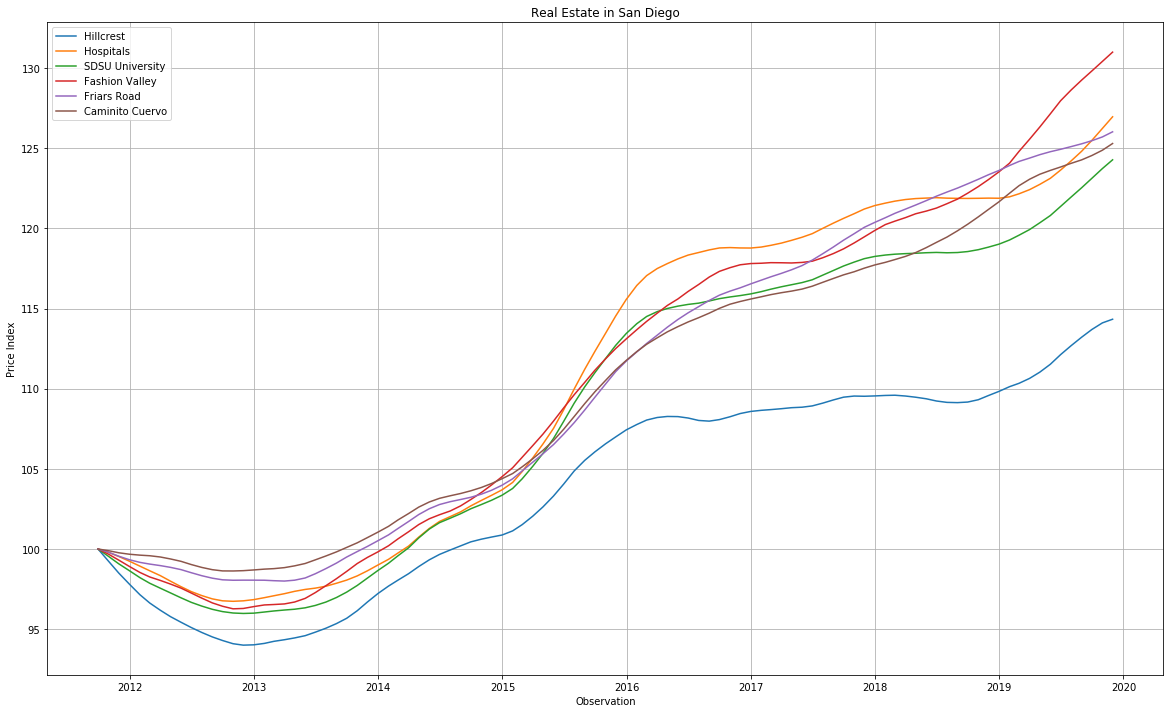

In [17]:

fig, ax = plt.subplots(1)

plt.rcParams['figure.figsize']=(16,10)


line1,= ax.plot(c_hillcrest)
line2,= ax.plot(c_hospitals)
line3,= ax.plot(c_university)
line4,= ax.plot(c_fashion)
line5,= ax.plot(c_friars)
line6,= ax.plot(c_caminito)



line1.set_label("Hillcrest")
line2.set_label("Hospitals")
line3.set_label("SDSU University")
line4.set_label("Fashion Valley")
line5.set_label("Friars Road")
line6.set_label("Caminito Cuervo")



plt.grid()
plt.legend()
plt.title("Real Estate in San Diego")
plt.ylabel("Price Index")
plt.xlabel("Observation")
plt.show()

In [9]:
chula_vista=[91910,91911,91913,91914,91915]
sd_1=np.arange(92101,92110,1).tolist()
sd_2=np.arange(92117,92125,1).tolist()
sd_3=np.arange(92127,92131,1).tolist()

# We will concatenate plain Python lists
zip_codes=chula_vista+sd_1+sd_2+sd_3
print(zip_codes)

[91910, 91911, 91913, 91914, 91915, 92101, 92102, 92103, 92104, 92105, 92106, 92107, 92108, 92109, 92117, 92118, 92119, 92120, 92121, 92122, 92123, 92124, 92127, 92128, 92129, 92130]


In [10]:
main_df=pd.DataFrame()

for zone in zip_codes:
    query="ZILLOW/Z"+str(zone)+"_ZTTY"
    df=quandl.get(query, authtoken=api_key)
    if main_df.empty:
        main_df=df
    else:
        main_df=main_df.join(df, rsuffix=str(zone))
        

In [11]:
#main_df.head()
new_column_name=zip_codes
main_df.columns=new_column_name
main_df.head()

,91910,91911,91913,91914,91915,92101,92102,92103,92104,92105,...,92119,92120,92121,92122,92123,92124,92127,92128,92129,92130
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-30,-0.048489,-0.048580,-0.063016,-0.019067,NaN,-0.034579,-0.062921,-0.091949,-0.025403,-0.048209,...,0.022426,-0.012609,0.011835,-0.019414,-0.024306,-0.017808,-0.026529,-0.011779,-0.023999,-0.014921
2011-10-31,-0.051308,-0.056278,-0.059680,0.006944,NaN,-0.042952,-0.052529,-0.088957,-0.030580,-0.043798,...,0.004804,-0.015550,-0.015202,-0.025876,-0.029809,-0.021936,-0.030460,-0.015134,-0.027265,-0.014710
2011-11-30,-0.052109,-0.063326,-0.052789,-0.000446,0.064263,-0.042668,-0.054517,-0.083535,-0.035080,-0.040763,...,0.004785,-0.010805,-0.016373,-0.021769,-0.026095,-0.016914,-0.026830,-0.009557,-0.020732,-0.014085
2011-12-31,-0.048752,-0.059805,-0.047887,0.000515,0.048337,-0.036017,-0.059137,-0.081079,-0.037600,-0.037048,...,0.012802,-0.006927,-0.015742,-0.021804,-0.020036,-0.015530,-0.024591,-0.006997,-0.020688,-0.017599
2012-01-31,-0.037619,-0.047851,-0.041140,0.009281,0.047032,-0.024137,-0.057852,-0.064183,-0.035047,-0.025197,...,0.013784,-0.004514,-0.017163,-0.024098,-0.012888,-0.008675,-0.042068,-0.004612,-0.014860,-0.011357


In [12]:
import pickle
# First we open the pickle file with the intention of writing bytes.
pickle_out=open('san_diego.pickle', 'wb')
# Then, we will dumpl the dataframe information
pickle.dump(main_df, pickle_out)
pickle_out.close()

In [15]:
pickle_in=open('san_diego.pickle', 'rb')
HPI_sd=pickle.load(pickle_in)

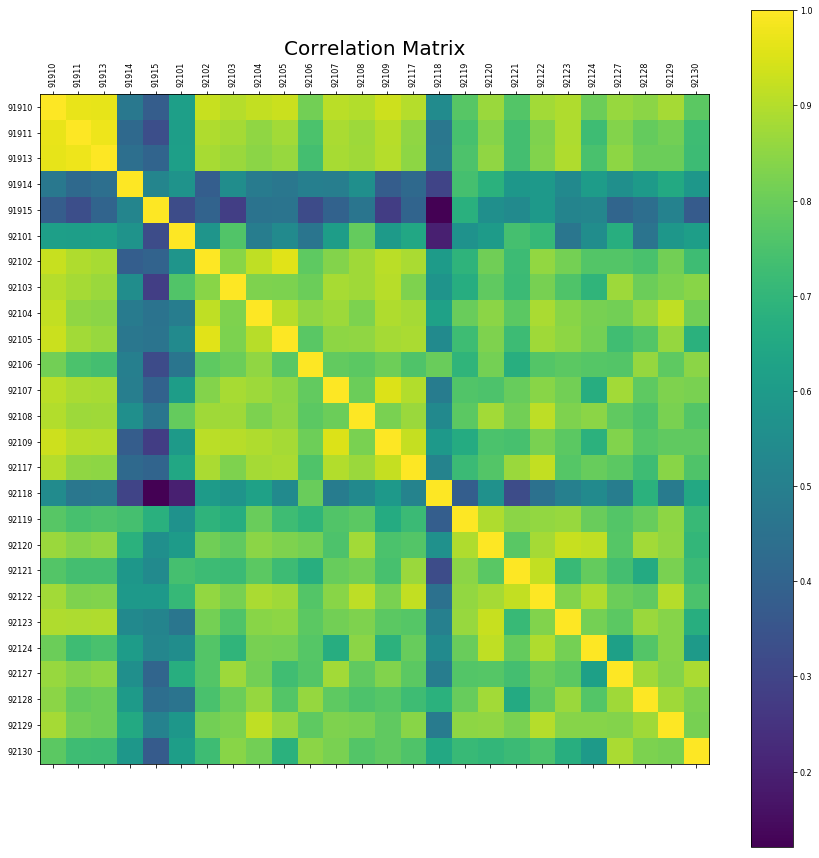

In [16]:
HPI_State_Correlation = HPI_sd.corr()

f= plt.figure(figsize=(15, 15))
plt.matshow(HPI_State_Correlation, fignum=f.number)
plt.xticks(range(HPI_State_Correlation.shape[1]), HPI_State_Correlation.columns, fontsize=8, rotation=90)
plt.yticks(range(HPI_State_Correlation.shape[1]), HPI_State_Correlation.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

These are the markets with the lowest correlation

- 91914 Chula Vista TJ Maxx  Otay Lakes
- 91915 Chula Vista Bonita
- 92101 San Diego From Hilton to Airport
- 92118 Coronado

In [23]:
coronado=quandl.get("ZILLOW/Z92118_ZTTY", authtoken=api_key)
hospitals=quandl.get("ZILLOW/Z92104_ZTTY", authtoken=api_key)
university=quandl.get("ZILLOW/Z92116_ZTTY", authtoken=api_key)
fashion=quandl.get("ZILLOW/Z92108_ZTTY", authtoken=api_key)


In [24]:
def cumm_level(neighborhood):
    index_n=neighborhood.index
    df= pd.DataFrame(index=index_n, columns=["Price Index"])
    n=len(neighborhood)
    df["Price Index"][0]=100
    m=np.arange(1,n)
    for j in m:
        df["Price Index"][j]=df["Price Index"][j-1]*(1+neighborhood["Value"][j-1]/12)
   
    return df

In [27]:
c_coronado=cumm_level(coronado)
c_hospitals=cumm_level(hospitals)
c_university=cumm_level(university)
c_fashion=cumm_level(fashion)


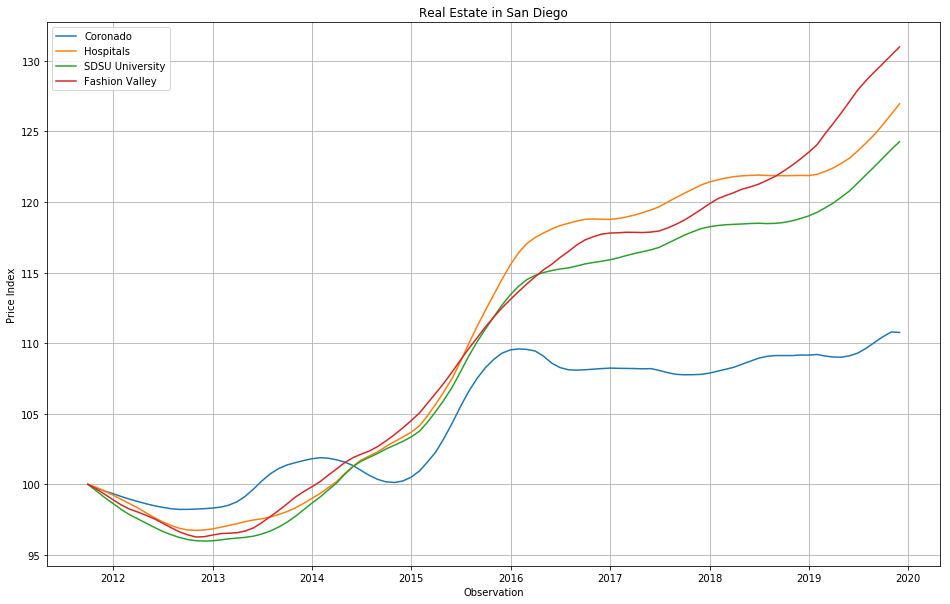

In [28]:
fig, ax = plt.subplots(1)

plt.rcParams['figure.figsize']=(16,10)

line1,= ax.plot(c_coronado)
line2,= ax.plot(c_hospitals)
line3,= ax.plot(c_university)
line4,= ax.plot(c_fashion)

line1.set_label("Coronado")
line2.set_label("Hospitals")
line3.set_label("SDSU University")
line4.set_label("Fashion Valley")

plt.grid()
plt.legend()
plt.title("Real Estate in San Diego")
plt.ylabel("Price Index")
plt.xlabel("Observation")
plt.show()

### 6.3. COMPARING SAN DIEGO AND MIAMI MARKETS

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import quandl

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
api_key=open('quandlapikey.txt','r').read()
quandl.ApiConfig.api_key = api_key

In [4]:
zip_codes=[92104,92116,92108,33154,33130, 33132, 33109]

In [5]:
main_df=pd.DataFrame()

for zone in zip_codes:
    query="ZILLOW/Z"+str(zone)+"_ZTTY"
    df=quandl.get(query, authtoken=api_key)
    if main_df.empty:
        main_df=df
    else:
        main_df=main_df.join(df, rsuffix=str(zone))

In [6]:
new_column_name=zip_codes
main_df.columns=new_column_name
main_df.head()

,92104,92116,92108,33154,33130,33132,33109
Date,,,,,,,
2011-09-30,-0.025403,-0.055417,-0.039124,0.021330,0.003134,0.048649,0.144709
2011-10-31,-0.030580,-0.055766,-0.044219,0.034889,0.024915,0.013896,0.192643
2011-11-30,-0.035080,-0.051508,-0.047303,0.034371,0.026920,0.011219,0.177251
2011-12-31,-0.037600,-0.052859,-0.045520,0.031272,0.028536,0.008130,0.121863
2012-01-31,-0.035047,-0.042945,-0.034541,0.037900,0.029302,0.037061,0.122725


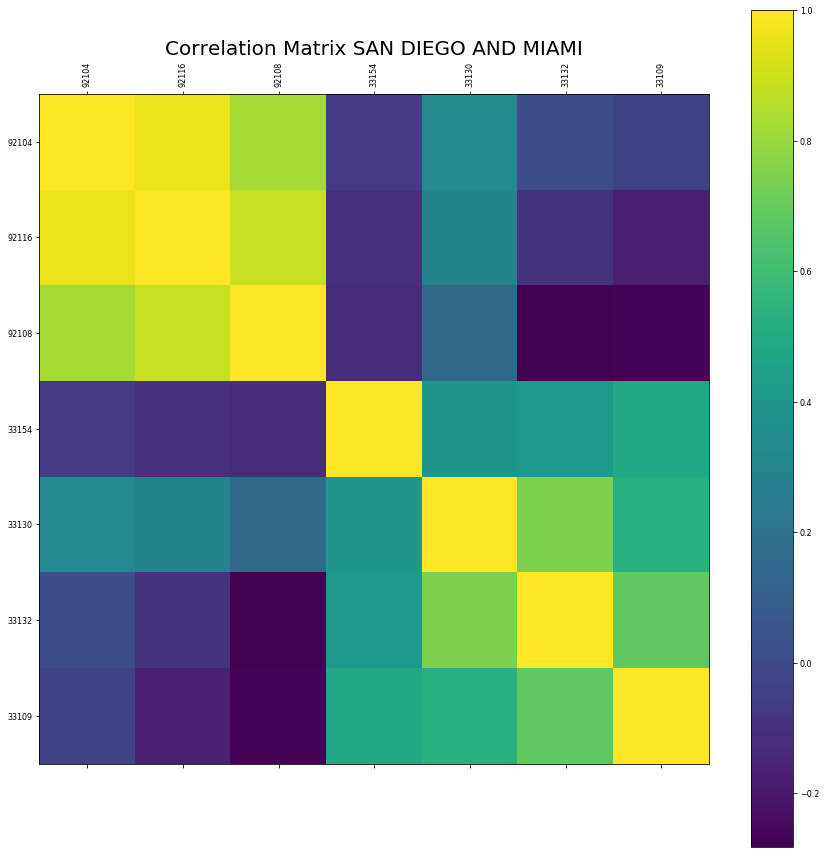

In [7]:
HPI_State_Correlation = main_df.corr()

f= plt.figure(figsize=(15, 15))
plt.matshow(HPI_State_Correlation, fignum=f.number)
plt.xticks(range(HPI_State_Correlation.shape[1]), HPI_State_Correlation.columns, fontsize=8, rotation=90)
plt.yticks(range(HPI_State_Correlation.shape[1]), HPI_State_Correlation.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix SAN DIEGO AND MIAMI', fontsize=20)
plt.show()

In [41]:
sd1=quandl.get("ZILLOW/Z92104_ZTTY", authtoken=api_key)
sd2=quandl.get("ZILLOW/Z92116_ZTTY", authtoken=api_key)
sd3=quandl.get("ZILLOW/Z92108_ZTTY", authtoken=api_key)
mia1=quandl.get("ZILLOW/Z33154_ZTTY", authtoken=api_key)
mia2=quandl.get("ZILLOW/Z33130_ZTTY", authtoken=api_key)
mia3=quandl.get("ZILLOW/Z33132_ZTTY", authtoken=api_key)
mia4=quandl.get("ZILLOW/Z33109_ZTTY", authtoken=api_key)

In [42]:
def cumm_level(neighborhood):
    index_n=neighborhood.index
    df= pd.DataFrame(index=index_n, columns=["Price Index"])
    n=len(neighborhood)
    df["Price Index"][0]=100
    m=np.arange(1,n)
    for j in m:
        df["Price Index"][j]=df["Price Index"][j-1]*(1+neighborhood["Value"][j-1]/12)
   
    return df

In [43]:
c_sd1=cumm_level(sd1)
c_sd2=cumm_level(sd2)
c_sd3=cumm_level(sd3)
c_mia1=cumm_level(mia1)
c_mia2=cumm_level(mia2)
c_mia3=cumm_level(mia3)
c_mia4=cumm_level(mia4)

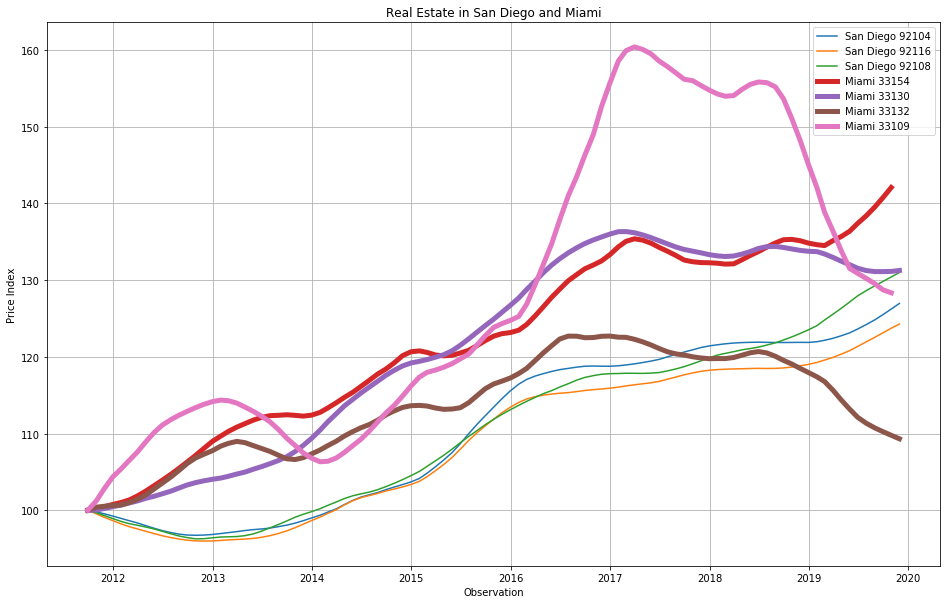

In [44]:
fig, ax = plt.subplots(1)

plt.rcParams['figure.figsize']=(16,10)

line1,= ax.plot(c_sd1)
line2,= ax.plot(c_sd2)
line3,= ax.plot(c_sd3)
line4,= ax.plot(c_mia1, linewidth=5)
line5,= ax.plot(c_mia2, linewidth=5)
line6,= ax.plot(c_mia3, linewidth=5)
line7,= ax.plot(c_mia4, linewidth=5)

line1.set_label("San Diego 92104")
line2.set_label("San Diego 92116")
line3.set_label("San Diego 92108")
line4.set_label("Miami 33154")
line5.set_label("Miami 33130")
line6.set_label("Miami 33132")
line7.set_label("Miami 33109")

plt.grid()
plt.legend()
plt.title("Real Estate in San Diego and Miami")
plt.ylabel("Price Index") 
plt.xlabel("Observation")
plt.show()

## 7. MISSING DATA

### 7.1.  BACKFILL "NA"

In [69]:
san_diego=sd2

In [70]:
san_diego["SD1yr"]=san_diego["Value"].resample("q").mean()

In [71]:
print(san_diego)

               Value     SD1yr
Date                          
2011-09-30 -0.055417 -0.055417
2011-10-31 -0.055766       NaN
2011-11-30 -0.051508       NaN
2011-12-31 -0.052859 -0.053378
2012-01-31 -0.042945       NaN
...              ...       ...
2019-05-31  0.056162       NaN
2019-06-30  0.058037  0.053116
2019-07-31  0.057094       NaN
2019-08-31  0.057531       NaN
2019-09-30  0.059335  0.057987

[97 rows x 2 columns]


In [72]:
san_diego.fillna(method='bfill', inplace=True)
san_diego.dropna(inplace=True)

In [73]:
print(san_diego)

               Value     SD1yr
Date                          
2011-09-30 -0.055417 -0.055417
2011-10-31 -0.055766 -0.053378
2011-11-30 -0.051508 -0.053378
2011-12-31 -0.052859 -0.053378
2012-01-31 -0.042945 -0.038975
...              ...       ...
2019-05-31  0.056162  0.053116
2019-06-30  0.058037  0.053116
2019-07-31  0.057094  0.057987
2019-08-31  0.057531  0.057987
2019-09-30  0.059335  0.057987

[97 rows x 2 columns]


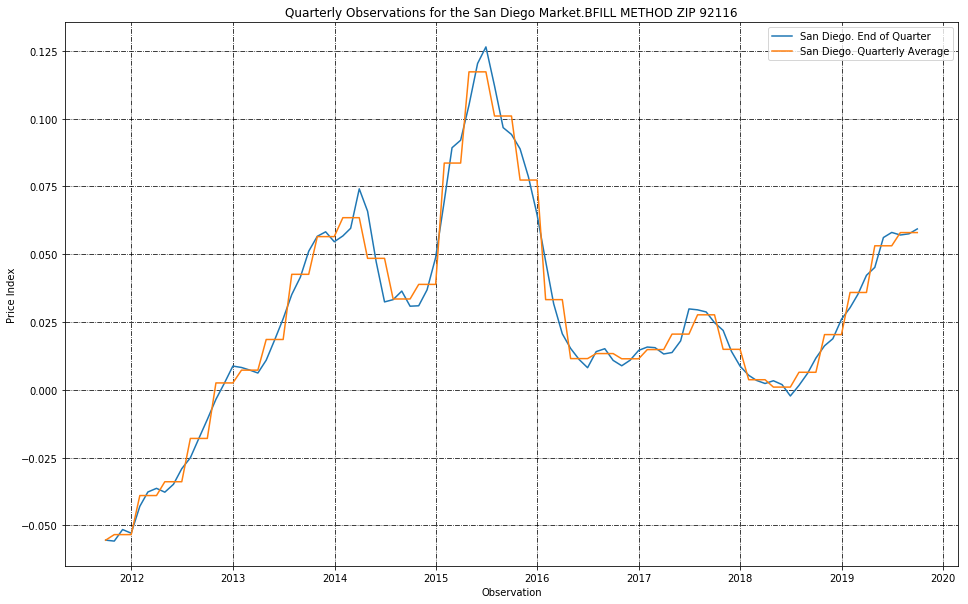

In [74]:
fig = plt.figure()
ax = plt.subplot2grid((1,1), (0,0))


line1,= ax.plot(san_diego["Value"])
line2,= ax.plot(san_diego["SD1yr"])

line1.set_label("San Diego. End of Quarter")
line2.set_label("San Diego. Quarterly Average")
plt.legend()
plt.title("Quarterly Observations for the San Diego Market.BFILL METHOD ZIP 92116")
plt.ylabel("Price Index") 
plt.xlabel("Observation")

plt.grid(color='k', linestyle='-.', linewidth=0.75)
plt.show()




### 7.2. FORWAD FILL NA VALUES

In [75]:
san_diego=sd2
san_diego["SD1yr"]=san_diego["Value"].resample("q").mean()
print(san_diego)

               Value     SD1yr
Date                          
2011-09-30 -0.055417 -0.055417
2011-10-31 -0.055766       NaN
2011-11-30 -0.051508       NaN
2011-12-31 -0.052859 -0.053378
2012-01-31 -0.042945       NaN
...              ...       ...
2019-05-31  0.056162       NaN
2019-06-30  0.058037  0.053116
2019-07-31  0.057094       NaN
2019-08-31  0.057531       NaN
2019-09-30  0.059335  0.057987

[97 rows x 2 columns]


In [76]:
san_diego.fillna(method='ffill', inplace=True)
san_diego.dropna(inplace=True)

In [77]:
print(san_diego)

               Value     SD1yr
Date                          
2011-09-30 -0.055417 -0.055417
2011-10-31 -0.055766 -0.055417
2011-11-30 -0.051508 -0.055417
2011-12-31 -0.052859 -0.053378
2012-01-31 -0.042945 -0.053378
...              ...       ...
2019-05-31  0.056162  0.035904
2019-06-30  0.058037  0.053116
2019-07-31  0.057094  0.053116
2019-08-31  0.057531  0.053116
2019-09-30  0.059335  0.057987

[97 rows x 2 columns]


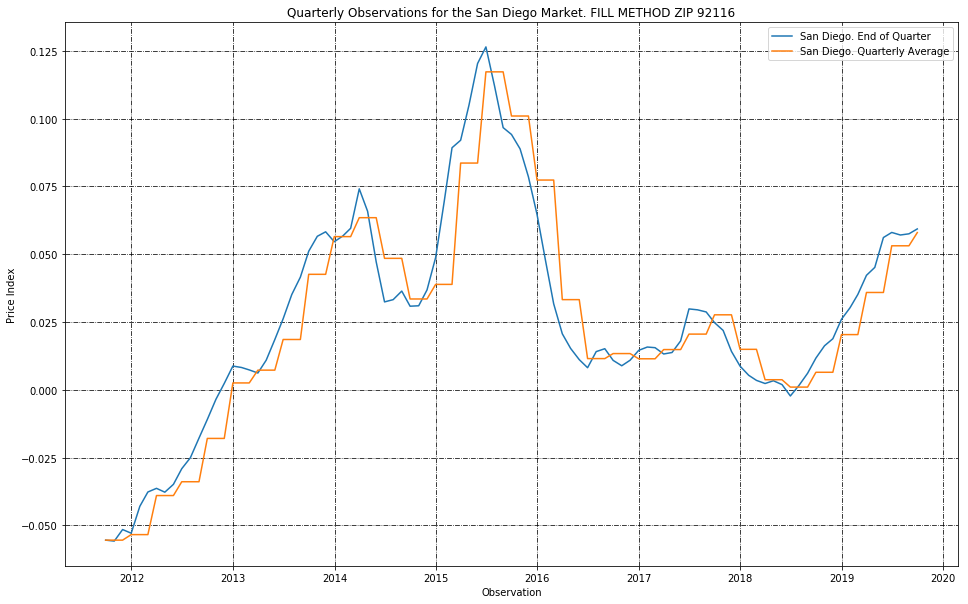

In [78]:
fig = plt.figure()
ax = plt.subplot2grid((1,1), (0,0))


line1,= ax.plot(san_diego["Value"])
line2,= ax.plot(san_diego["SD1yr"])

line1.set_label("San Diego. End of Quarter")
line2.set_label("San Diego. Quarterly Average")
plt.legend()
plt.title("Quarterly Observations for the San Diego Market. FILL METHOD ZIP 92116")
plt.ylabel("Price Index") 
plt.xlabel("Observation")

plt.grid(color='k', linestyle='-.', linewidth=0.75)
plt.show()

## 8. COMPARISONS

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()


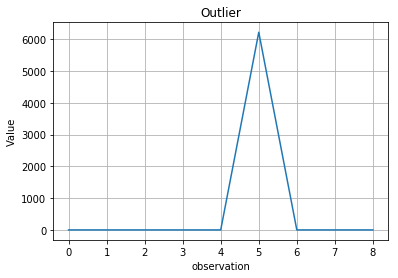

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

bridge_height = {'meters':[10.26, 10.31, 10.27, 10.22, 10.23, 6212.42, 10.28, 10.25, 10.31]}
df = pd.DataFrame(bridge_height)
plt.plot(df)
plt.grid()
plt.title("Outlier")
plt.xlabel("observation")
plt.ylabel("Value")
plt.show()

In [3]:
df_std = df.describe()
print(df_std)
df_std = df.describe()['meters']['std']
print(df_std)



            meters
count     9.000000
mean    699.394444
std    2067.384584
min      10.220000
25%      10.250000
50%      10.270000
75%      10.310000
max    6212.420000
2067.3845835687607


In [8]:
df['STD'] = df['meters'].rolling(2).std()
print(df)

    meters          STD
0    10.26          NaN
1    10.31     0.035355
2    10.27     0.028284
3    10.22     0.035355
4    10.23     0.007071
5  6212.42  4385.610607
6    10.28  4385.575252
7    10.25     0.021213
8    10.31     0.042426


In [9]:
df = df[ (df['STD'] < df_std) ]
print(df)

   meters       STD
1   10.31  0.035355
2   10.27  0.028284
3   10.22  0.035355
4   10.23  0.007071
7   10.25  0.021213
8   10.31  0.042426
